Завдання 4. Візуалізація піраміди

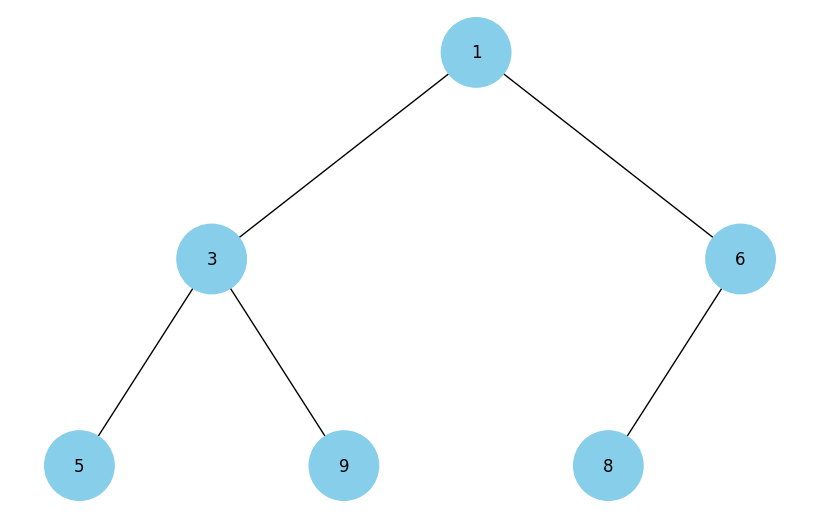

In [ ]:
import uuid
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color
        self.id = str(uuid.uuid4())

def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, color=node.color, label=node.val)
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2 ** layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2 ** layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph

def draw_tree(tree_root):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)

    colors = [node[1]['color'] for node in tree.nodes(data=True)]
    labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)}

    plt.figure(figsize=(8, 5))
    nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)
    plt.show()

def build_heap_from_array(arr):
    if len(arr) == 0:
        return None
    root = Node(arr[0])
    queue = [(root, 0)]
    while queue:
        current, i = queue.pop(0)
        left_index = 2 * i + 1
        right_index = 2 * i + 2
        if left_index < len(arr):
            current.left = Node(arr[left_index])
            queue.append((current.left, left_index))
        if right_index < len(arr):
            current.right = Node(arr[right_index])
            queue.append((current.right, right_index))
    return root


heap_array = [1, 3, 6, 5, 9, 8]
heap_root = build_heap_from_array(heap_array)

draw_tree(heap_root)


Завдання 5. Візуалізація обходу бінарного дерева

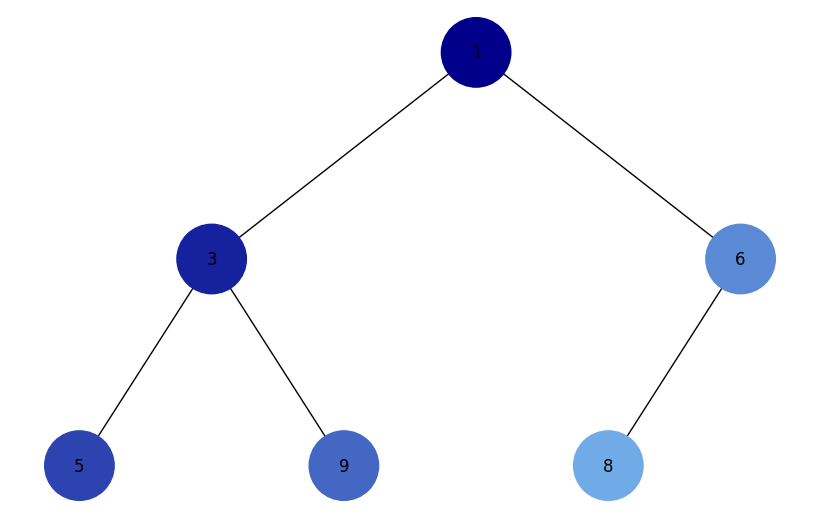

In [ ]:
import uuid
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, key, color="#FFFFFF"):  # Задаємо колір за замовчуванням як білий
        self.left = None
        self.right = None
        self.val = key
        self.color = color
        self.id = str(uuid.uuid4())

def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, color=node.color, label=node.val)
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2 ** layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2 ** layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph

def draw_tree(tree_root):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)
    colors = [node[1]['color'] for node in tree.nodes(data=True)]
    labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)}
    plt.figure(figsize=(8, 5))
    nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)
    plt.show()

def generate_color(step, total_steps):
    start_color = (0, 0, 139)  # Темно-синій
    end_color = (135, 206, 250)  # Світло-синій
    ratio = step / total_steps
    new_color = tuple(int(start_color[i] + (end_color[i] - start_color[i]) * ratio) for i in range(3))
    return '#{:02x}{:02x}{:02x}'.format(*new_color)

def build_heap_from_array(arr):
    if len(arr) == 0:
        return None
    root = Node(arr[0])
    queue = [(root, 0)]
    while queue:
        current, i = queue.pop(0)
        left_index = 2 * i + 1
        right_index = 2 * i + 2
        if left_index < len(arr):
            current.left = Node(arr[left_index])
            queue.append((current.left, left_index))
        if right_index < len(arr):
            current.right = Node(arr[right_index])
            queue.append((current.right, right_index))
    return root

def dfs_update_colors(node, visited_nodes=[], step=0, total_steps=None):
    if node and node.id not in visited_nodes:
        if total_steps is None:
            total_steps = len(visited_nodes) + dfs_count_nodes(node)
        node.color = generate_color(step, total_steps)
        visited_nodes.append(node.id)
        step += 1
        if node.left:
            step = dfs_update_colors(node.left, visited_nodes, step, total_steps)
        if node.right:
            step = dfs_update_colors(node.right, visited_nodes, step, total_steps)
    return step

def dfs_count_nodes(node):
    if node is None:
        return 0
    return 1 + dfs_count_nodes(node.left) + dfs_count_nodes(node.right)

def bfs_update_colors(root):
    if root is None:
        return
    queue = [root]
    visited_nodes = []
    step = 0
    total_steps = bfs_count_nodes(root)
    while queue:
        current_node = queue.pop(0)
        if current_node.id not in visited_nodes:
            current_node.color = generate_color(step, total_steps)
            visited_nodes.append(current_node.id)
            step += 1
            if current_node.left:
                queue.append(current_node.left)
            if current_node.right:
                queue.append(current_node.right)

def bfs_count_nodes(root):
    if root is None:
        return 0
    queue = [root]
    count = 0
    while queue:
        current_node = queue.pop(0)
        count += 1
        if current_node.left:
            queue.append(current_node.left)
        if current_node.right:
            queue.append(current_node.right)
    return count

heap_array = [1, 3, 6, 5, 9, 8]
heap_root = build_heap_from_array(heap_array)

dfs_update_colors(heap_root)
draw_tree(heap_root)


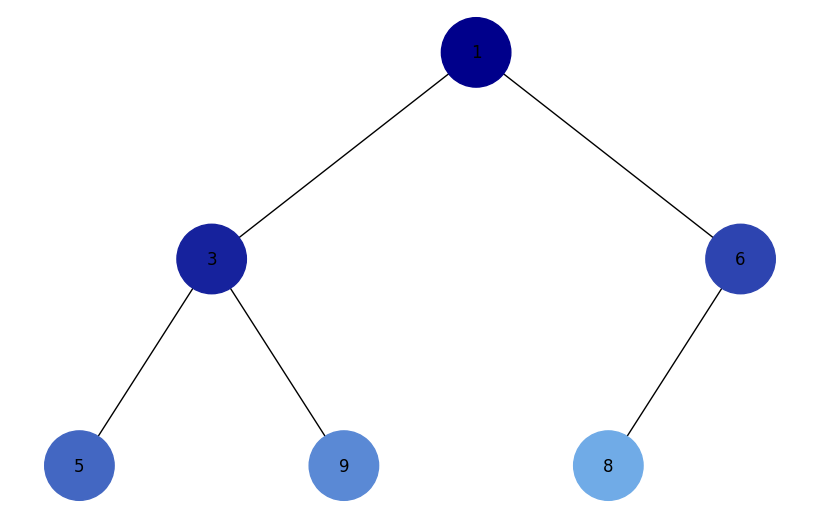

In [ ]:
bfs_update_colors(heap_root)
draw_tree(heap_root)

Завдання 6: Жадібні алгоритми та динамічне програмування

In [ ]:
items = {
    "pizza": {"cost": 50, "calories": 300},
    "hamburger": {"cost": 40, "calories": 250},
    "hot-dog": {"cost": 30, "calories": 200},
    "pepsi": {"cost": 10, "calories": 100},
    "cola": {"cost": 15, "calories": 220},
    "potato": {"cost": 25, "calories": 350}
}

def greedy_algorithm(items, budget):
    sorted_items = sorted(items.items(), key=lambda x: x[1]["calories"] / x[1]["cost"], reverse=True)

    selected_items = []
    total_cost = 0

    for item, values in sorted_items:
        if total_cost + values["cost"] <= budget:
            selected_items.append(item)
            total_cost += values["cost"]

    return selected_items

def dynamic_programming(items, budget):
    items_list = list(items.items())
    n = len(items_list)

    dp = [[0 for x in range(budget + 1)] for y in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(1, budget + 1):
            if items_list[i-1][1]["cost"] <= w:
                dp[i][w] = max(items_list[i-1][1]["calories"] + dp[i-1][w-items_list[i-1][1]["cost"]], dp[i-1][w])
            else:
                dp[i][w] = dp[i-1][w]

    result = []
    w = budget
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            result.append(items_list[i-1][0])
            w -= items_list[i-1][1]["cost"]

    result.reverse()
    return result

print(greedy_algorithm(items, 100))
print(dynamic_programming(items, 100))


['cola', 'potato', 'pepsi', 'hot-dog']
['pizza', 'pepsi', 'cola', 'potato']


Завдання 7: Використання методу Монте-Карло

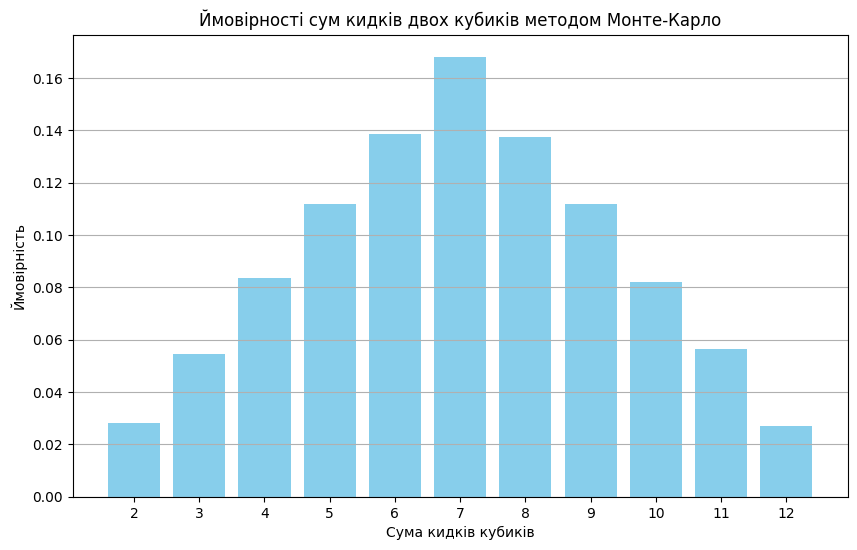

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_dice_rolls(n_rolls=10000):

    rolls_1 = np.random.randint(1, 7, n_rolls)
    rolls_2 = np.random.randint(1, 7, n_rolls)
    sums = rolls_1 + rolls_2

    counts = np.bincount(sums)[2:]
    probs = counts / n_rolls

    return {sum_val+2: prob for sum_val, prob in enumerate(probs)}

def plot_probabilities(probs):

    lists = sorted(probs.items())
    x, y = zip(*lists)

    plt.figure(figsize=(10, 6))
    plt.bar(x, y, color='skyblue')
    plt.xlabel('Сума кидків кубиків')
    plt.ylabel('Ймовірність')
    plt.title('Ймовірності сум кидків двох кубиків методом Монте-Карло')
    plt.xticks(range(2, 13))
    plt.grid(axis='y')
    plt.show()

probs = monte_carlo_dice_rolls(100000)
plot_probabilities(probs)


Висновок
Цілком очікувано. що числа 6-8 будуть мати найбільший шанс бути отриманими з суми кидків двох кубиківб так як вони можуть бути отримані в ширшого спектру комбінацій чисел, ніж числа як 3 чи 12, де є тільки 1 допустима комбінація.